# 6-2,训练模型的3种方法

Pytorch通常需要用户编写自定义训练循环，训练循环的代码风格因人而异。

有3类典型的训练循环代码风格：脚本形式训练循环，函数形式训练循环，类形式训练循环。

下面以minist数据集的分类模型的训练为例，演示这3种训练模型的风格。

其中类形式训练循环我们会使用torchkeras.Model和torchkeras.LightModel这两种方法。


### 〇，准备数据

In [8]:
import torch 
from torch import nn 

import torchvision 
from torchvision import transforms


In [9]:
transform = transforms.Compose([transforms.ToTensor()])

ds_train = torchvision.datasets.MNIST(root="./data/minist/",train=True,download=True,transform=transform)
ds_valid = torchvision.datasets.MNIST(root="./data/minist/",train=False,download=True,transform=transform)

dl_train =  torch.utils.data.DataLoader(ds_train, batch_size=128, shuffle=True, num_workers=4)
dl_valid =  torch.utils.data.DataLoader(ds_valid, batch_size=128, shuffle=False, num_workers=4)

print(len(ds_train))
print(len(ds_valid))


60000
10000


In [12]:
ds_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/minist/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

```
60000
10000
```

torch.Size([1, 28, 28])
5
torch.Size([1, 28, 28])
0
torch.Size([1, 28, 28])
4
torch.Size([1, 28, 28])
1
torch.Size([1, 28, 28])
9
torch.Size([1, 28, 28])
2
torch.Size([1, 28, 28])
1
torch.Size([1, 28, 28])
3
torch.Size([1, 28, 28])
1


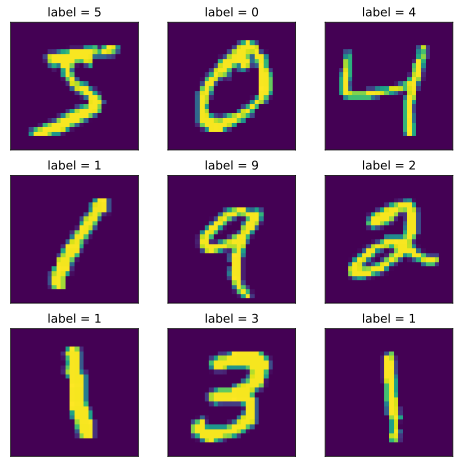

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#查看部分样本
from matplotlib import pyplot as plt 

plt.figure(figsize=(8,8)) 
for i in range(9):
    img,label = ds_train[i]
    print(img.shape)
    print(label)
    img = torch.squeeze(img)
    ax=plt.subplot(3,3,i+1)
    ax.imshow(img.numpy())
    ax.set_title("label = %d"%label)
    ax.set_xticks([])
    ax.set_yticks([]) 
plt.show()

![](./data/6-2-minist.png)

### 一，脚本风格

脚本风格的训练循环最为常见。

In [4]:
net = nn.Sequential()
net.add_module("conv1",nn.Conv2d(in_channels=1,out_channels=32,kernel_size = 3))
net.add_module("pool1",nn.MaxPool2d(kernel_size = 2,stride = 2))
net.add_module("conv2",nn.Conv2d(in_channels=32,out_channels=64,kernel_size = 5))
net.add_module("pool2",nn.MaxPool2d(kernel_size = 2,stride = 2))
net.add_module("dropout",nn.Dropout2d(p = 0.1))
net.add_module("adaptive_pool",nn.AdaptiveMaxPool2d((1,1)))
net.add_module("flatten",nn.Flatten())
net.add_module("linear1",nn.Linear(64,32))
net.add_module("relu",nn.ReLU())
net.add_module("linear2",nn.Linear(32,10))

print(net)

Sequential(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout2d(p=0.1, inplace=False)
  (adaptive_pool): AdaptiveMaxPool2d(output_size=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=64, out_features=32, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)


```
Sequential(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout2d(p=0.1, inplace=False)
  (adaptive_pool): AdaptiveMaxPool2d(output_size=(1, 1))
  (flatten): Flatten()
  (linear1): Linear(in_features=64, out_features=32, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)
```

In [5]:
from torchkeras import summary
summary(net,input_shape=(1,32,32))

/usr/local/lib/python3.6/dist-packages/pytorch_lightning/metrics/__init__.py:44: LightningDeprecationWarning: `pytorch_lightning.metrics.*` module has been renamed to `torchmetrics.*` and split off to its own package (https://github.com/PyTorchLightning/metrics) since v1.3 and will be removed in v1.5
  "`pytorch_lightning.metrics.*` module has been renamed to `torchmetrics.*` and split off to its own package"


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             320
         MaxPool2d-2           [-1, 32, 15, 15]               0
            Conv2d-3           [-1, 64, 11, 11]          51,264
         MaxPool2d-4             [-1, 64, 5, 5]               0
         Dropout2d-5             [-1, 64, 5, 5]               0
 AdaptiveMaxPool2d-6             [-1, 64, 1, 1]               0
           Flatten-7                   [-1, 64]               0
            Linear-8                   [-1, 32]           2,080
              ReLU-9                   [-1, 32]               0
           Linear-10                   [-1, 10]             330
Total params: 53,994
Trainable params: 53,994
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.003906
Forward/backward pass size (MB): 0.359695
Params size (MB): 0.205971
E

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


```
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
================================================================
            Conv2d-1           [-1, 32, 30, 30]             320
         MaxPool2d-2           [-1, 32, 15, 15]               0
            Conv2d-3           [-1, 64, 11, 11]          51,264
         MaxPool2d-4             [-1, 64, 5, 5]               0
         Dropout2d-5             [-1, 64, 5, 5]               0
 AdaptiveMaxPool2d-6             [-1, 64, 1, 1]               0
           Flatten-7                   [-1, 64]               0
            Linear-8                   [-1, 32]           2,080
              ReLU-9                   [-1, 32]               0
           Linear-10                   [-1, 10]             330
================================================================
Total params: 53,994
Trainable params: 53,994
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.003906
Forward/backward pass size (MB): 0.359695
Params size (MB): 0.205971
Estimated Total Size (MB): 0.569572
----------------------------------------------------------------
```

In [6]:
import datetime
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score

def accuracy(y_pred,y_true):
    y_pred_cls = torch.argmax(nn.Softmax(dim=1)(y_pred),dim=1).data
    return accuracy_score(y_true,y_pred_cls)

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=net.parameters(),lr = 0.01)
metric_func = accuracy
metric_name = "accuracy"


In [12]:
epochs = 3
log_step_freq = 100

dfhistory = pd.DataFrame(columns = ["epoch","loss",metric_name,"val_loss","val_"+metric_name]) 
print("Start Training...")
nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print("=========="*8 + "%s"%nowtime)

for epoch in range(1,epochs+1):  

    # 1，训练循环-------------------------------------------------
    net.train()
    loss_sum = 0.0
    metric_sum = 0.0
    step = 1
    
    for step, (features,labels) in enumerate(dl_train, 1):
    
        # 梯度清零
        optimizer.zero_grad()

        # 正向传播求损失
        predictions = net(features)
        loss = loss_func(predictions,labels)
        metric = metric_func(predictions,labels)
        
        # 反向传播求梯度
        loss.backward()
        optimizer.step()

        # 打印batch级别日志
        loss_sum += loss.item()
        metric_sum += metric.item()
        if step%log_step_freq == 0:   
            print(("[step = %d] loss: %.3f, "+metric_name+": %.3f") %
                  (step, loss_sum/step, metric_sum/step))
            
    # 2，验证循环-------------------------------------------------
    net.eval()
    val_loss_sum = 0.0
    val_metric_sum = 0.0
    val_step = 1

    for val_step, (features,labels) in enumerate(dl_valid, 1):
        with torch.no_grad():
            predictions = net(features)
            val_loss = loss_func(predictions,labels)
            val_metric = metric_func(predictions,labels)

        val_loss_sum += val_loss.item()
        val_metric_sum += val_metric.item()

    # 3，记录日志-------------------------------------------------
    info = (epoch, loss_sum/step, metric_sum/step, 
            val_loss_sum/val_step, val_metric_sum/val_step)
    dfhistory.loc[epoch-1] = info
    
    # 打印epoch级别日志
    print(("\nEPOCH = %d, loss = %.3f,"+ metric_name + \
          "  = %.3f, val_loss = %.3f, "+"val_"+ metric_name+" = %.3f") 
          %info)
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"=========="*8 + "%s"%nowtime)
        
print('Finished Training...')


Start Training...
================================================================================2021-07-02 15:13:38
[step = 100] loss: 0.984, accuracy: 0.662
[step = 200] loss: 0.609, accuracy: 0.795
[step = 300] loss: 0.463, accuracy: 0.846
[step = 400] loss: 0.382, accuracy: 0.874

EPOCH = 1, loss = 0.345,accuracy  = 0.887, val_loss = 0.131, val_accuracy = 0.961

================================================================================2021-07-02 15:13:59
[step = 100] loss: 0.137, accuracy: 0.961
[step = 200] loss: 0.129, accuracy: 0.962
[step = 300] loss: 0.125, accuracy: 0.962
[step = 400] loss: 0.115, accuracy: 0.965

EPOCH = 2, loss = 0.111,accuracy  = 0.966, val_loss = 0.071, val_accuracy = 0.979

================================================================================2021-07-02 15:14:22
[step = 100] loss: 0.094, accuracy: 0.972
[step = 200] loss: 0.094, accuracy: 0.971
[step = 300] loss: 0.093, accuracy: 0.971
[step = 400] loss: 0.093, accuracy: 0.972

EPOCH = 3

```
Start Training...
================================================================================2020-06-26 12:49:16
[step = 100] loss: 0.742, accuracy: 0.745
[step = 200] loss: 0.466, accuracy: 0.843
[step = 300] loss: 0.363, accuracy: 0.880
[step = 400] loss: 0.310, accuracy: 0.898

EPOCH = 1, loss = 0.281,accuracy  = 0.908, val_loss = 0.087, val_accuracy = 0.972

================================================================================2020-06-26 12:50:32
[step = 100] loss: 0.103, accuracy: 0.970
[step = 200] loss: 0.114, accuracy: 0.966
[step = 300] loss: 0.112, accuracy: 0.967
[step = 400] loss: 0.108, accuracy: 0.968

EPOCH = 2, loss = 0.111,accuracy  = 0.967, val_loss = 0.082, val_accuracy = 0.976

================================================================================2020-06-26 12:51:47
[step = 100] loss: 0.093, accuracy: 0.972
[step = 200] loss: 0.095, accuracy: 0.971
[step = 300] loss: 0.092, accuracy: 0.972
[step = 400] loss: 0.093, accuracy: 0.972

EPOCH = 3, loss = 0.098,accuracy  = 0.971, val_loss = 0.113, val_accuracy = 0.970

================================================================================2020-06-26 12:53:09
Finished Training...
```

### 二，函数风格

该风格在脚本形式上作了简单的函数封装。

In [9]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleList([
            nn.Conv2d(in_channels=1,out_channels=32,kernel_size = 3),
            nn.MaxPool2d(kernel_size = 2,stride = 2),
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size = 5),
            nn.MaxPool2d(kernel_size = 2,stride = 2),
            nn.Dropout2d(p = 0.1),
            nn.AdaptiveMaxPool2d((1,1)),
            nn.Flatten(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,10)]
        )
    def forward(self,x):
        for layer in self.layers:
            x = layer(x)
        return x
net = Net()
print(net)

Net(
  (layers): ModuleList(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout2d(p=0.1, inplace=False)
    (5): AdaptiveMaxPool2d(output_size=(1, 1))
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=64, out_features=32, bias=True)
    (8): ReLU()
    (9): Linear(in_features=32, out_features=10, bias=True)
  )
)


```
Net(
  (layers): ModuleList(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout2d(p=0.1, inplace=False)
    (5): AdaptiveMaxPool2d(output_size=(1, 1))
    (6): Flatten()
    (7): Linear(in_features=64, out_features=32, bias=True)
    (8): ReLU()
    (9): Linear(in_features=32, out_features=10, bias=True)
  )
)
```

In [12]:
summary(net,input_shape=(1,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             320
         MaxPool2d-2           [-1, 32, 15, 15]               0
            Conv2d-3           [-1, 64, 11, 11]          51,264
         MaxPool2d-4             [-1, 64, 5, 5]               0
         Dropout2d-5             [-1, 64, 5, 5]               0
 AdaptiveMaxPool2d-6             [-1, 64, 1, 1]               0
           Flatten-7                   [-1, 64]               0
            Linear-8                   [-1, 32]           2,080
              ReLU-9                   [-1, 32]               0
           Linear-10                   [-1, 10]             330
Total params: 53,994
Trainable params: 53,994
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.003906
Forward/backward pass size (MB): 0.359695
Params size (MB): 0.205971
E

```
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
================================================================
            Conv2d-1           [-1, 32, 30, 30]             320
         MaxPool2d-2           [-1, 32, 15, 15]               0
            Conv2d-3           [-1, 64, 11, 11]          51,264
         MaxPool2d-4             [-1, 64, 5, 5]               0
         Dropout2d-5             [-1, 64, 5, 5]               0
 AdaptiveMaxPool2d-6             [-1, 64, 1, 1]               0
           Flatten-7                   [-1, 64]               0
            Linear-8                   [-1, 32]           2,080
              ReLU-9                   [-1, 32]               0
           Linear-10                   [-1, 10]             330
================================================================
Total params: 53,994
Trainable params: 53,994
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.003906
Forward/backward pass size (MB): 0.359695
Params size (MB): 0.205971
Estimated Total Size (MB): 0.569572
----------------------------------------------------------------
```

In [13]:
import datetime
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score

def accuracy(y_pred,y_true):
    y_pred_cls = torch.argmax(nn.Softmax(dim=1)(y_pred),dim=1).data
    return accuracy_score(y_true,y_pred_cls)

model = net
model.optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)
model.loss_func = nn.CrossEntropyLoss()
model.metric_func = accuracy
model.metric_name = "accuracy"


In [18]:
def train_step(model,features,labels):
    
    # 训练模式，dropout层发生作用
    model.train()
    
    # 梯度清零
    model.optimizer.zero_grad()
    
    # 正向传播求损失
    predictions = model(features)
    loss = model.loss_func(predictions,labels)
    metric = model.metric_func(predictions,labels)

    # 反向传播求梯度
    loss.backward()
    model.optimizer.step()

    return loss.item(),metric.item()

@torch.no_grad()
def valid_step(model,features,labels):
    
    # 预测模式，dropout层不发生作用
    model.eval()
    
    predictions = model(features)
    loss = model.loss_func(predictions,labels)
    metric = model.metric_func(predictions,labels)
    
    return loss.item(), metric.item()


# 测试train_step效果
features,labels = next(iter(dl_train))
train_step(model,features,labels)


(2.3187813758850098, 0.1015625)

```
(2.32741117477417, 0.1015625)
```

In [17]:
def train_model(model,epochs,dl_train,dl_valid,log_step_freq):

    metric_name = model.metric_name
    dfhistory = pd.DataFrame(columns = ["epoch","loss",metric_name,"val_loss","val_"+metric_name]) 
    print("Start Training...")
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("=========="*8 + "%s"%nowtime)

    for epoch in range(1,epochs+1):  

        # 1，训练循环-------------------------------------------------
        loss_sum = 0.0
        metric_sum = 0.0
        step = 1

        for step, (features,labels) in enumerate(dl_train, 1):

            loss,metric = train_step(model,features,labels)

            # 打印batch级别日志
            loss_sum += loss
            metric_sum += metric
            if step%log_step_freq == 0:   
                print(("[step = %d] loss: %.3f, "+metric_name+": %.3f") %
                      (step, loss_sum/step, metric_sum/step))

        # 2，验证循环-------------------------------------------------
        val_loss_sum = 0.0
        val_metric_sum = 0.0
        val_step = 1

        for val_step, (features,labels) in enumerate(dl_valid, 1):

            val_loss,val_metric = valid_step(model,features,labels)

            val_loss_sum += val_loss
            val_metric_sum += val_metric

        # 3，记录日志-------------------------------------------------
        info = (epoch, loss_sum/step, metric_sum/step, 
                val_loss_sum/val_step, val_metric_sum/val_step)
        dfhistory.loc[epoch-1] = info

        # 打印epoch级别日志
        print(("\nEPOCH = %d, loss = %.3f,"+ metric_name + \
              "  = %.3f, val_loss = %.3f, "+"val_"+ metric_name+" = %.3f") 
              %info)
        nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        print("\n"+"=========="*8 + "%s"%nowtime)

    print('Finished Training...')
    return dfhistory


In [18]:
epochs = 3
dfhistory = train_model(model,epochs,dl_train,dl_valid,log_step_freq = 100)


Start Training...
================================================================================2021-07-02 15:21:58
[step = 100] loss: 2.300, accuracy: 0.112
[step = 200] loss: 2.291, accuracy: 0.148
[step = 300] loss: 2.281, accuracy: 0.188
[step = 400] loss: 2.268, accuracy: 0.216

EPOCH = 1, loss = 2.258,accuracy  = 0.231, val_loss = 2.168, val_accuracy = 0.403

================================================================================2021-07-02 15:22:20
[step = 100] loss: 2.146, accuracy: 0.339
[step = 200] loss: 2.100, accuracy: 0.357
[step = 300] loss: 2.049, accuracy: 0.384
[step = 400] loss: 1.984, accuracy: 0.422

EPOCH = 2, loss = 1.937,accuracy  = 0.445, val_loss = 1.534, val_accuracy = 0.749

================================================================================2021-07-02 15:22:42
[step = 100] loss: 1.477, accuracy: 0.628
[step = 200] loss: 1.366, accuracy: 0.649
[step = 300] loss: 1.259, accuracy: 0.674
[step = 400] loss: 1.163, accuracy: 0.695

EPOCH = 3

```
Start Training...
================================================================================2020-06-26 13:10:00
[step = 100] loss: 2.298, accuracy: 0.137
[step = 200] loss: 2.288, accuracy: 0.145
[step = 300] loss: 2.278, accuracy: 0.165
[step = 400] loss: 2.265, accuracy: 0.183

EPOCH = 1, loss = 2.254,accuracy  = 0.195, val_loss = 2.158, val_accuracy = 0.301

================================================================================2020-06-26 13:11:23
[step = 100] loss: 2.127, accuracy: 0.302
[step = 200] loss: 2.080, accuracy: 0.338
[step = 300] loss: 2.025, accuracy: 0.374
[step = 400] loss: 1.957, accuracy: 0.411

EPOCH = 2, loss = 1.905,accuracy  = 0.435, val_loss = 1.469, val_accuracy = 0.710

================================================================================2020-06-26 13:12:43
[step = 100] loss: 1.435, accuracy: 0.615
[step = 200] loss: 1.324, accuracy: 0.647
[step = 300] loss: 1.221, accuracy: 0.672
[step = 400] loss: 1.132, accuracy: 0.696

EPOCH = 3, loss = 1.074,accuracy  = 0.711, val_loss = 0.582, val_accuracy = 0.878

================================================================================2020-06-26 13:13:59
Finished Training...
```

### 三，类风格 torchkeras.Model

此处使用torchkeras.Model构建模型，并调用compile方法和fit方法训练模型。

使用该形式训练模型非常简洁明了。


In [19]:
import torchkeras 

In [23]:
class CnnModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleList([
            nn.Conv2d(in_channels=1,out_channels=32,kernel_size = 3),
            nn.MaxPool2d(kernel_size = 2,stride = 2),
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size = 5),
            nn.MaxPool2d(kernel_size = 2,stride = 2),
            nn.Dropout2d(p = 0.1),
            nn.AdaptiveMaxPool2d((1,1)),
            nn.Flatten(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,10)]
        )
    def forward(self,x):
        for layer in self.layers:
            x = layer(x)
        return x
model = torchkeras.Model(CnnModel())
print(model)

Model(
  (net): CnnModel(
    (layers): ModuleList(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
      (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Dropout2d(p=0.1, inplace=False)
      (5): AdaptiveMaxPool2d(output_size=(1, 1))
      (6): Flatten(start_dim=1, end_dim=-1)
      (7): Linear(in_features=64, out_features=32, bias=True)
      (8): ReLU()
      (9): Linear(in_features=32, out_features=10, bias=True)
    )
  )
)


```
CnnModel(
  (layers): ModuleList(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout2d(p=0.1, inplace=False)
    (5): AdaptiveMaxPool2d(output_size=(1, 1))
    (6): Flatten()
    (7): Linear(in_features=64, out_features=32, bias=True)
    (8): ReLU()
    (9): Linear(in_features=32, out_features=10, bias=True)
  )
)
```

In [24]:
model.summary(input_shape=(1,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             320
         MaxPool2d-2           [-1, 32, 15, 15]               0
            Conv2d-3           [-1, 64, 11, 11]          51,264
         MaxPool2d-4             [-1, 64, 5, 5]               0
         Dropout2d-5             [-1, 64, 5, 5]               0
 AdaptiveMaxPool2d-6             [-1, 64, 1, 1]               0
           Flatten-7                   [-1, 64]               0
            Linear-8                   [-1, 32]           2,080
              ReLU-9                   [-1, 32]               0
           Linear-10                   [-1, 10]             330
Total params: 53,994
Trainable params: 53,994
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.003906
Forward/backward pass size (MB): 0.359695
Params size (MB): 0.205971
E

```
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
================================================================
            Conv2d-1           [-1, 32, 30, 30]             320
         MaxPool2d-2           [-1, 32, 15, 15]               0
            Conv2d-3           [-1, 64, 11, 11]          51,264
         MaxPool2d-4             [-1, 64, 5, 5]               0
         Dropout2d-5             [-1, 64, 5, 5]               0
 AdaptiveMaxPool2d-6             [-1, 64, 1, 1]               0
           Flatten-7                   [-1, 64]               0
            Linear-8                   [-1, 32]           2,080
              ReLU-9                   [-1, 32]               0
           Linear-10                   [-1, 10]             330
================================================================
Total params: 53,994
Trainable params: 53,994
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.003906
Forward/backward pass size (MB): 0.359695
Params size (MB): 0.205971
Estimated Total Size (MB): 0.569572
----------------------------------------------------------------
```

In [25]:
from sklearn.metrics import accuracy_score

def accuracy(y_pred,y_true):
    y_pred_cls = torch.argmax(nn.Softmax(dim=1)(y_pred),dim=1).data
    return accuracy_score(y_true.numpy(),y_pred_cls.numpy())

model.compile(loss_func = nn.CrossEntropyLoss(),
             optimizer= torch.optim.Adam(model.parameters(),lr = 0.02),
             metrics_dict={"accuracy":accuracy})


In [26]:
dfhistory = model.fit(3,dl_train = dl_train, dl_val=dl_valid, log_step_freq=100) 

Start Training ...

================================================================================2021-07-02 15:24:25
{'step': 100, 'loss': 0.841, 'accuracy': 0.716}
{'step': 200, 'loss': 0.542, 'accuracy': 0.823}
{'step': 300, 'loss': 0.421, 'accuracy': 0.863}
{'step': 400, 'loss': 0.367, 'accuracy': 0.883}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   1   | 0.345 |  0.891   |  0.172   |    0.958     |
+-------+-------+----------+----------+--------------+

================================================================================2021-07-02 15:24:49
{'step': 100, 'loss': 0.154, 'accuracy': 0.957}
{'step': 200, 'loss': 0.147, 'accuracy': 0.958}
{'step': 300, 'loss': 0.147, 'accuracy': 0.959}
{'step': 400, 'loss': 0.147, 'accuracy': 0.958}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-----

```
Start Training ...

================================================================================2020-06-26 13:22:39
{'step': 100, 'loss': 0.976, 'accuracy': 0.664}
{'step': 200, 'loss': 0.611, 'accuracy': 0.795}
{'step': 300, 'loss': 0.478, 'accuracy': 0.841}
{'step': 400, 'loss': 0.403, 'accuracy': 0.868}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   1   | 0.371 |  0.879   |  0.087   |    0.972     |
+-------+-------+----------+----------+--------------+

================================================================================2020-06-26 13:23:59
{'step': 100, 'loss': 0.182, 'accuracy': 0.948}
{'step': 200, 'loss': 0.176, 'accuracy': 0.949}
{'step': 300, 'loss': 0.173, 'accuracy': 0.95}
{'step': 400, 'loss': 0.174, 'accuracy': 0.951}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   2   | 0.175 |  0.951   |  0.152   |    0.958     |
+-------+-------+----------+----------+--------------+

================================================================================2020-06-26 13:25:22
{'step': 100, 'loss': 0.143, 'accuracy': 0.961}
{'step': 200, 'loss': 0.151, 'accuracy': 0.959}
{'step': 300, 'loss': 0.149, 'accuracy': 0.96}
{'step': 400, 'loss': 0.152, 'accuracy': 0.959}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   3   | 0.153 |  0.959   |  0.086   |    0.975     |
+-------+-------+----------+----------+--------------+

================================================================================2020-06-26 13:26:48
Finished Training...
```

### 四，类风格 torchkeras.LightModel

下面示范torchkeras.LightModel的使用范例，详细用法可以参照

In [ ]:
import torchkeras 
import pytorch_lightning as pl 

class CnnNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleList([
            nn.Conv2d(in_channels=1,out_channels=32,kernel_size = 3),
            nn.MaxPool2d(kernel_size = 2,stride = 2),
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size = 5),
            nn.MaxPool2d(kernel_size = 2,stride = 2),
            nn.Dropout2d(p = 0.1),
            nn.AdaptiveMaxPool2d((1,1)),
            nn.Flatten(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,10)]
        )
    def forward(self,x):
        for layer in self.layers:
            x = layer(x)
        return x
    

class Model(torchkeras.LightModel):
    
    #loss,and optional metrics
    def shared_step(self,batch)->dict:
        x, y = batch
        prediction = self(x)
        loss = nn.CrossEntropyLoss()(prediction,y)
        preds = torch.argmax(nn.Softmax(dim=1)(prediction),dim=1).data
        acc = pl.metrics.functional.accuracy(preds, y)
        dic = {"loss":loss,"acc":acc} 
        return dic
    
    #optimizer,and optional lr_scheduler
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-2)
        lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.0001)
        return {"optimizer":optimizer,"lr_scheduler":lr_scheduler}
    
pl.seed_everything(1234)
net = CnnNet()
model = Model(net)

torchkeras.summary(model,input_shape=(1,32,32))
print(model)


In [ ]:
ckpt_cb = pl.callbacks.ModelCheckpoint(monitor='val_loss')

# set gpus=0 will use cpu，
# set gpus=1 will use 1 gpu
# set gpus=2 will use 2gpus 
# set gpus = -1 will use all gpus 
# you can also set gpus = [0,1] to use the  given gpus
# you can even set tpu_cores=2 to use two tpus 

trainer = pl.Trainer(max_epochs=10,gpus = 0, callbacks=[ckpt_cb]) 

trainer.fit(model,dl_train,dl_valid)


```
================================================================================2021-01-16 22:32:45
epoch =  0
{'val_loss': 0.0954340249300003, 'val_acc': 0.9727057218551636}
{'acc': 0.910403311252594, 'loss': 0.27809813618659973}

================================================================================2021-01-16 22:34:12
epoch =  1
{'val_loss': 0.06748798489570618, 'val_acc': 0.9809137582778931}
{'acc': 0.9663013219833374, 'loss': 0.10915637016296387}

================================================================================2021-01-16 22:35:38
epoch =  2
{'val_loss': 0.06344369053840637, 'val_acc': 0.980320394039154}
{'acc': 0.9712153673171997, 'loss': 0.09515620768070221}

================================================================================2021-01-16 22:37:05
epoch =  3
{'val_loss': 0.08105307072401047, 'val_acc': 0.977155864238739}
{'acc': 0.9747745990753174, 'loss': 0.08337805420160294}

================================================================================2021-01-16 22:38:32
epoch =  4
{'val_loss': 0.06881670653820038, 'val_acc': 0.9798259735107422}
{'acc': 0.9764847159385681, 'loss': 0.08077647536993027}

================================================================================2021-01-16 22:39:59
epoch =  5
{'val_loss': 0.07127966731786728, 'val_acc': 0.980320394039154}
{'acc': 0.9758350849151611, 'loss': 0.08572731912136078}

================================================================================2021-01-16 22:41:25
epoch =  6
{'val_loss': 0.1256944239139557, 'val_acc': 0.9672666192054749}
{'acc': 0.978233814239502, 'loss': 0.07292930781841278}

================================================================================2021-01-16 22:42:52
epoch =  7
{'val_loss': 0.08458385616540909, 'val_acc': 0.9767602682113647}
{'acc': 0.9790666699409485, 'loss': 0.0768343135714531}

================================================================================2021-01-16 22:44:18
epoch =  8
{'val_loss': 0.06721501052379608, 'val_acc': 0.983188271522522}
{'acc': 0.9786669015884399, 'loss': 0.07818026840686798}

================================================================================2021-01-16 22:45:44
epoch =  9
{'val_loss': 0.06671519577503204, 'val_acc': 0.9839794039726257}
{'acc': 0.9826259613037109, 'loss': 0.06241251528263092}
```


**如果本书对你有所帮助，想鼓励一下作者，记得给本项目加一颗星星star⭐️，并分享给你的朋友们喔😊!** 

如果对本书内容理解上有需要进一步和作者交流的地方，欢迎在公众号"算法美食屋"下留言。作者时间和精力有限，会酌情予以回复。

也可以在公众号后台回复关键字：**加群**，加入读者交流群和大家讨论。

![算法美食屋logo.png](./data/算法美食屋二维码.jpg)